# Mnist dataset.

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. (Website)[http://yann.lecun.com/exdb/mnist/]

In [117]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation

## 1. Load the dataset

In [30]:
# Load the dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set the number of classes.
num_classes = np.max(y_train) + 1

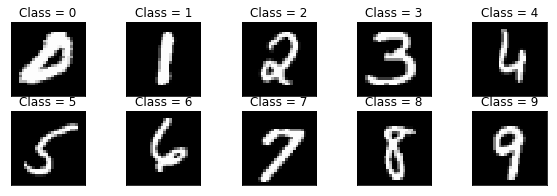

In [31]:
# Display an image for each class.
fig = plt.figure(figsize=(10,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im, cmap="gray")
    plt.title("Class = {}".format(i))
plt.show()

## 2. Handle data.

In [41]:
# Reshape as channel first.
size_tr = x_train.shape
size_te = x_test.shape
x_tr = x_train.reshape(size_tr[0], 1, size_tr[1], size_tr[2])
x_te = x_test.reshape(size_te[0], 1, size_te[1], size_te[2])

# Process the images.
x_tr = x_tr / 255
x_te = x_te / 255

# Display the images size.
print("y_tr size = {}".format(x_tr.shape))
print("y_te size = {}".format(x_te.shape))

y_tr size = (60000, 1, 28, 28)
y_te size = (10000, 1, 28, 28)


In [42]:
# Process the classes.
y_tr = to_categorical(y_train, num_classes)
y_te = to_categorical(y_test, num_classes)

# Display the classes size.
print("y_tr size = {}".format(y_tr.shape))
print("y_te size = {}".format(y_te.shape))

y_tr size = (60000, 10)
y_te size = (10000, 10)


## 3. Model.

In [74]:
# Initialise the the model.
model = Sequential()

# First convolutional layer.
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation="relu",
                 data_format="channels_first",
                 input_shape=(1, 28, 28)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer.
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layer.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Parameter fitting.
fit_params = {
    "batch_size": 128,
    "epochs": 12,
    "verbose": 1,
    "shuffle": True,
    "validation_data": (x_te, y_te)
}

# Fit the model.
history = model.fit(x_tr, y_tr, **fit_params)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2911 - acc: 0.9078 - val_loss: 0.0810 - val_acc: 0.9739
Epoch 2/12
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0864 - acc: 0.9740 - val_loss: 0.0455 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0577 - acc: 0.9828 - val_loss: 0.0325 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0445 - acc: 0.9866 - val_loss: 0.0308 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0345 - acc: 0.9896 - val_loss: 0.0340 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0248 - acc: 0.9920 - val_loss: 0.0279 - val_

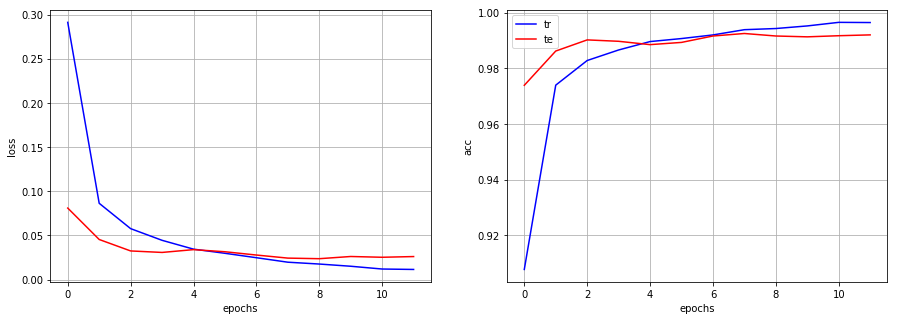

In [75]:
# Visualise the resuls.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history["loss"], color="b", label="tr")
plt.plot(history.history["val_loss"], color="r", label="te")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid()
plt.subplot(122)
plt.plot(history.history["acc"], color="b", label="tr")
plt.plot(history.history["val_acc"], color="r", label="te")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.grid()
plt.legend()
plt.show()

Now, we can save the trained model for later inference. We save the model to the 'models' directory under 'mnist' name. 

In [76]:
# Save the model.
model.save("models/mnist.h5")

## 4. Evaluation.

We can evaluate the model now, first we have to load it.

### a. Evaluate the metrics.

In [77]:
# Set the model filepath.
filepath = "models/mnist.h5"

# Load the model.
model = keras.models.load_model(filepath)

In [88]:
# Start the timer.
time_start = time.time()

# Evaluate the performance of the model.
loss_te, acc_te = model.evaluate(x_te, y_te)

# End the timer.
time_final = time.time()

# Compute elapsed time in ms.
elapsed = 1000 * ( time_final - time_start )
avg_ms_pr_img = elapsed / x_te.shape[0]

10000/10000 [==============================] - 9s 926us/step


In [90]:
# Display evaluation information.
print("Test inference:")
print("loss = {}".format(loss_te))
print("accuracy = {}".format(acc_te))
print("avg_ms_pr_img  = {} [ms\img]".format(avg_ms_pr_img))
print("elapsed time = {} [ms]".format(elapsed))

Test inference:
loss = 0.026148675219031976
accuracy = 0.992
avg_ms_pr_img  = 0.9263458013534546 [ms\img]
elapsed time = 9263.458013534546 [ms]


### b. Classification report.

In [123]:
# Model test inference.
y_pred = model.predict(x_te)
y_pred = np.eye(num_classes)[np.argmax(y_pred, axis=1).reshape(-1)]

# Display the classification report.
print(classification_report(y_te, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9949    0.9939    0.9944       980
          1     0.9887    0.9991    0.9939      1135
          2     0.9894    0.9961    0.9928      1032
          3     0.9921    0.9931    0.9926      1010
          4     0.9889    0.9939    0.9914       982
          5     0.9910    0.9877    0.9893       892
          6     0.9906    0.9916    0.9911       958
          7     0.9941    0.9903    0.9922      1028
          8     0.9938    0.9908    0.9923       974
          9     0.9970    0.9822    0.9895      1009

avg / total     0.9920    0.9920    0.9920     10000

